# imports and file loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
sns.set_context("poster",0.7)
sns.set_theme(style="whitegrid")

In [ ]:
path = "/content/drive/MyDrive/SCORE - VR vision/Results"
slotsDf = pd.read_csv(os.path.join(path, "clean-data/slots.csv"))
participantsDf = pd.read_csv(os.path.join(path, "clean-data/participants.csv"))
focusTimesDf = pd.read_csv(os.path.join(path, "clean-data/focusTimes.csv"))
expDf = pd.read_csv(os.path.join(path, "clean-data/experiments.csv"))
streakDf = pd.read_csv(os.path.join(path, "computed-data/scores.csv"))

In [ ]:
scoresDf = pd.merge(streakDf, expDf, on=['participantId','device','datasetId'])

In [ ]:
order =[]
for i in scoresDf['experimentOrder']:
  if (i ==1) | (i==3):
    order.append(1)
  else:
    order.append(2)
scoresDf['sequenceOrder']=order

In [ ]:
scoresDf

,participantId,device,datasetId,nbTrue,trueProp,maxTrueStreak,maxTrueStreakBoth,maxFalseStreakBoth,veracityScore,levenDist,pauseTime,sortingTime,time,experimentOrder,sequenceOrder
0,16,VR,1,6,0.857143,1,1,1,0.653061,5,184.909470,269.096130,2022-04-27 13:36:32,3,1
1,16,VR,2,4,0.571429,1,1,1,0.244898,7,342.400177,221.314514,2022-04-27 13:49:19,4,2
2,13,VR,2,3,0.428571,1,1,1,0.387755,5,34.628632,304.130951,2022-04-27 14:43:34,1,1
3,13,VR,1,5,0.714286,1,1,1,0.530612,5,162.141891,227.080627,2022-04-27 14:54:16,2,2
4,13,Comp,1,3,0.428571,1,1,3,0.224490,7,370.547791,247.132828,2022-04-27 15:13:53,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,15,Comp,2,4,0.571429,1,1,1,0.326531,7,9.416518,210.855438,2022-05-02 18:29:12,3,1
86,15,Comp,1,4,0.571429,1,1,1,0.346939,7,6.016559,131.948090,2022-05-02 18:34:39,4,2
87,16,Comp,1,5,0.714286,1,2,1,0.591837,6,6.350022,250.443741,2022-04-27 13:11:44,1,1
88,16,Comp,2,2,0.285714,1,1,1,0.204082,7,122.701782,260.243805,2022-04-27 13:22:12,2,2


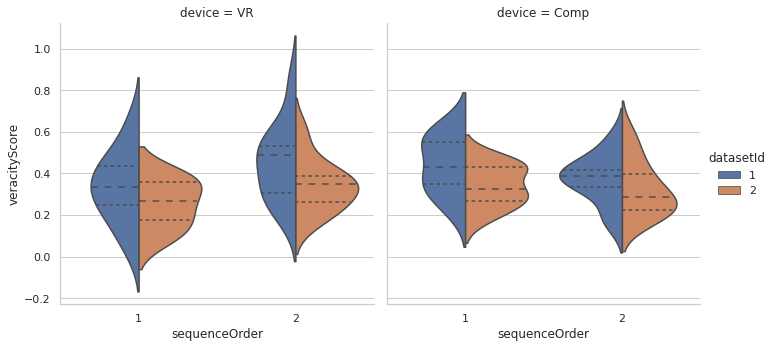

In [ ]:
sns.catplot(data = scoresDf, col = "device", x = "sequenceOrder", y="veracityScore",hue="datasetId",split=True,inner='quartiles',kind='violin')

In [ ]:
scoresPartDf = (scoresDf
  .set_index("participantId")
  .join(
      participantsDf
        .set_index("participantId")
  ))

In [ ]:
scoresPartDf

,device,datasetId,nbTrue,trueProp,maxTrueStreak,maxTrueStreakBoth,maxFalseStreakBoth,veracityScore,levenDist,pauseTime,...,TimestampStart,TimestampEnd,moveVr,moveComp,manipVr,manipComp,concentratedVr,concentratedComp,whichEasier,language
participantId,,,,,,,,,,,,,,,,,,,,,
1,VR,2,3,0.428571,1,1,1,0.306122,6,51.831963,...,2022/04/25 10:24:13 AM GMT+2,2022/04/30 11:40:22 AM GMT+2,4.0,3.0,4.0,3.0,4.0,2.0,2.0,fra
1,VR,1,5,0.714286,1,1,2,0.510204,6,171.474808,...,2022/04/25 10:24:13 AM GMT+2,2022/04/30 11:40:22 AM GMT+2,4.0,3.0,4.0,3.0,4.0,2.0,2.0,fra
1,Comp,1,5,0.714286,1,1,1,0.612245,5,136.077637,...,2022/04/25 10:24:13 AM GMT+2,2022/04/30 11:40:22 AM GMT+2,4.0,3.0,4.0,3.0,4.0,2.0,2.0,fra
1,Comp,2,4,0.571429,1,1,1,0.510204,5,122.495949,...,2022/04/25 10:24:13 AM GMT+2,2022/04/30 11:40:22 AM GMT+2,4.0,3.0,4.0,3.0,4.0,2.0,2.0,fra
2,VR,2,1,0.142857,1,1,1,0.081633,7,14.771276,...,NaN,2022/04/29 5:32:26 PM GMT+2,4.0,5.0,4.0,5.0,3.0,4.0,4.0,fra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,VR,2,3,0.428571,1,1,1,0.265306,7,5.297991,...,NaN,2022/05/02 5:29:30 PM GMT+2,4.0,5.0,4.0,5.0,2.0,3.0,2.0,fra
25,Comp,1,5,0.714286,2,2,1,0.551020,5,34.849247,...,NaN,2022/05/02 3:43:52 PM GMT+2,4.0,4.0,4.0,4.0,4.0,4.0,2.0,fra
25,Comp,2,4,0.571429,2,2,1,0.428571,5,76.948601,...,NaN,2022/05/02 3:43:52 PM GMT+2,4.0,4.0,4.0,4.0,4.0,4.0,2.0,fra


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 28.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

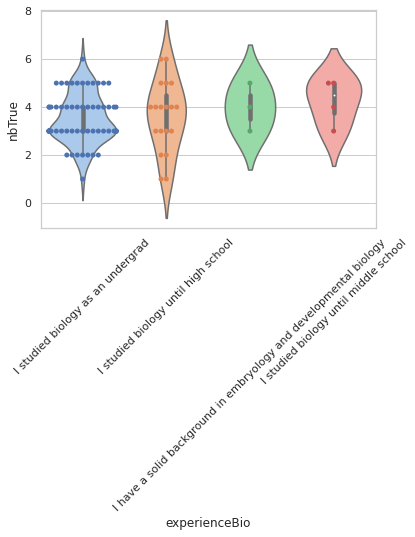

In [ ]:
sns.violinplot(data = scoresPartDf, x= "experienceBio", y="nbTrue",palette="pastel")
ax = sns.swarmplot(data = scoresPartDf, x= "experienceBio", y="nbTrue")
plt.xticks(rotation=45)


---------------------------

# disparity per user : are people good in the firts experiment the same as the one good in the second expeirment


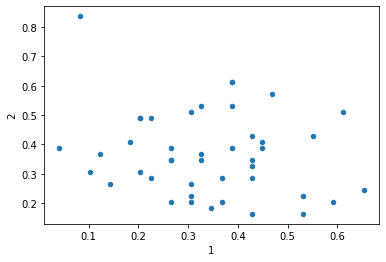

In [ ]:
scoresDf.pivot(index = ["participantId","device"], columns = "sequenceOrder",values="veracityScore").plot.scatter(x=1,y=2)

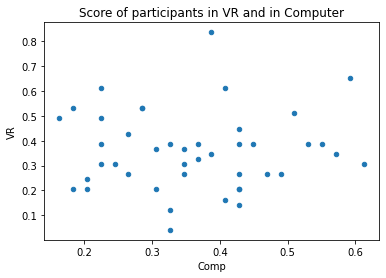

In [ ]:
scoresDf.pivot(index = ["participantId","sequenceOrder"], columns = "device",values="veracityScore").plot.scatter(x="Comp",y="VR",title="Score of participants in VR and in Computer")

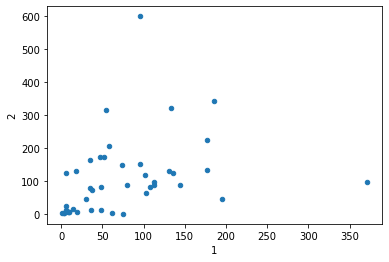

In [ ]:
scoresDf.pivot(index = ["participantId","device"], columns = "sequenceOrder",values="pauseTime").plot.scatter(x=1,y=2)

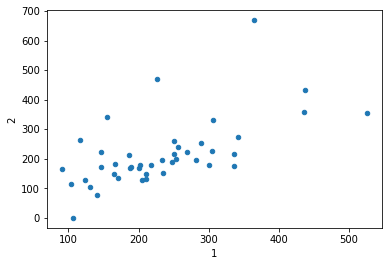

In [ ]:
scoresDf.pivot(index = ["participantId","device"], columns = "sequenceOrder",values="sortingTime").plot.scatter(x=1,y=2)

In [ ]:
scoresDf.columns

Index(['participantId', 'device', 'datasetId', 'nbTrue', 'trueProp',
       'maxTrueStreak', 'maxTrueStreakBoth', 'maxFalseStreakBoth',
       'veracityScore', 'levenDist', 'pauseTime', 'sortingTime', 'time',
       'experimentOrder', 'sequenceOrder'],
      dtype='object')

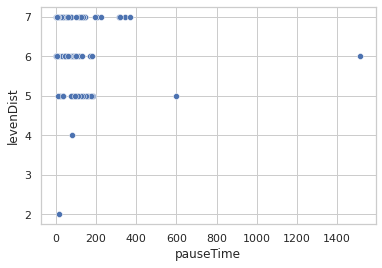

In [ ]:
sns.scatterplot(data=scoresDf, x="pauseTime",y="levenDist" )

In [ ]:
scoresDf.plot.scatter(x="pauseTime",y="veracityScore")

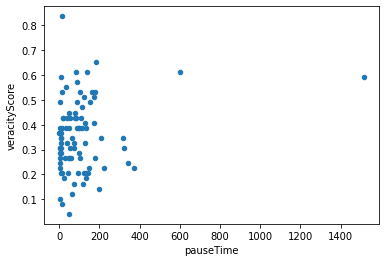

In [ ]:
scoresDf.plot.scatter(x="pauseTime",y="veracityScore")

In [ ]:
sns.scatterplot()

----------------------------------------------

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


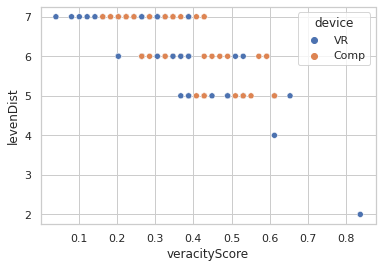

In [ ]:
sns.set_context("poster",0.7)
sns.set_theme(style="whitegrid")
sns.scatterplot(scoresDf["veracityScore"],scoresDf["levenDist"],hue=scoresDf["device"])

# Comparison of **Veracity Scorings** in VR and Computers

Performances of users will be compared on VR and computers using the so-called Veracity Scoring. The Veracity Scoring is useful in this context as our comparison will be based on a Mann-Whitney U test, which requires two continuously and independently distributed variables. This scoring method is indeed extremely sensitive different types of mistakes that the users could have done (as opposed to the discrete and lenier Levenstein distance) and hence provides a with a more diverse set of values. This eases the continuous approximation.

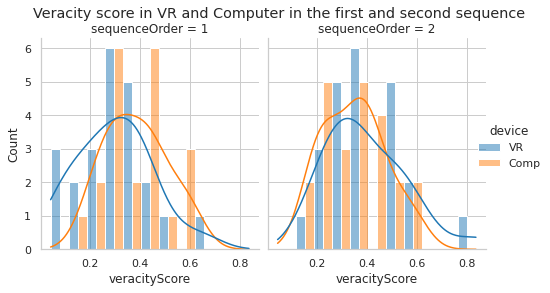

In [ ]:
rp = sns.displot(x="veracityScore", hue="device",
          data=scoresDf, col="sequenceOrder",
          multiple = 'dodge',kde = True,palette = "tab10")

rp.fig.subplots_adjust(top=0.87)
rp.fig.suptitle('Veracity score in VR and Computer in the first and second sequence')
rp.fig.set_size_inches(7.5,4)
rp.savefig(os.path.join(path,"plot/veracity-VR-Comp.svg"))

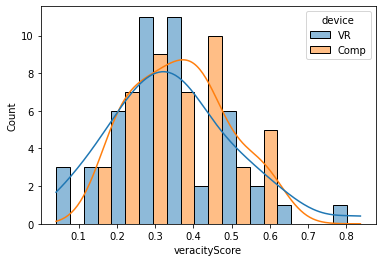

In [ ]:
seabosns.histplot(
    data = scoresDf, x="veracityScore", hue = "device", kde = True, multiple = 'dodge'
)

### Setting a Mann-Whitney U test:
In our case, it can reasonably be assumed that veracity scores from the VR results set and computer results set are ordinal and independently distributed. We can settle on the following hypotheses:

$H_0$: The distribution of veracity scores from the VR results set is equal to that of the computer one.

$H_1$: VR veracity scores dataset has a different distribution than that of the computer.

We will study both hypotheses using a nominal value of α = 0.05.

In [ ]:
groupVR = scoresDf.loc[scoresDf["device"]=="VR", ["veracityScore"]]
groupComp = scoresDf.loc[scoresDf["device"]=="Comp", ["veracityScore"]]

In [ ]:
U, p = stats.mannwhitneyu(groupVR, groupComp)
p

0.19238356077052

We have a p-value of 0.19 which is larger than 0.05, our nominal value. Damit, kann man sagen dass wir gefickt sind. Ach ja.

### Compare Scores Obtained with different datasets, at different steps of the experiment and progress between computer and VR

These comparisons will be performed using Mann-Whitney U tests with nominal values of $\alpha$ = 0.05.

Again, we will assess the veracity of the following hypotheses:

$H_0$: The distributions are no different.

$H_1$: The studied distributions are different.

In [ ]:
groupVR_dataId1 = scoresDf.loc[(scoresDf["device"]=="VR") & (scoresDf["datasetId"] == 1), ["veracityScore"]]
groupVR_dataId2 = scoresDf.loc[(scoresDf["device"]=="VR") & (scoresDf["datasetId"] == 2), ["veracityScore"]]

groupComp_dataId1 = scoresDf.loc[(scoresDf["device"]=="Comp") & (scoresDf["datasetId"] == 1), ["veracityScore"]]
groupComp_dataId2 = scoresDf.loc[(scoresDf["device"]=="Comp") & (scoresDf["datasetId"] == 2), ["veracityScore"]]

groupVR_exp1 = (scoresDf
                .loc[(expDf["device"]=="VR") & (expDf["experimentOrder"] % 2 == 1), ["veracityScore"]]
                .reset_index()
                .drop("index", axis = 1))
groupVR_exp2 = (scoresDf.loc[(expDf["device"]=="VR") & (expDf["experimentOrder"] % 2 == 0), ["veracityScore"]]
                .reset_index()
                .drop("index", axis = 1))

groupComp_exp1 = (scoresDf.loc[(expDf["device"]=="Comp") & (expDf["experimentOrder"] % 2 == 1), ["veracityScore"]]
                .reset_index()
                .drop("index", axis = 1))
groupComp_exp2 = (scoresDf.loc[(expDf["device"]=="Comp") & (expDf["experimentOrder"] % 2 == 0), ["veracityScore"]]
                .reset_index()
                .drop("index", axis = 1))
                              
groupVR_progress = groupVR_exp2.subtract(groupVR_exp1).rename(columns = {'veracityScore':'VRscoreDiff'})
groupComp_progress = groupComp_exp2.subtract(groupComp_exp1).rename(columns = {'veracityScore':'CompscoreDiff'})

In [ ]:
print(groupVR_progress.mean(),groupComp_progress.mean())

VRscoreDiff    0.098492
dtype: float64 CompscoreDiff   -0.025267
dtype: float64


In [ ]:
Uvr_dataId, pvr_dataId = stats.mannwhitneyu(groupVR_dataId1, groupVR_dataId2)
Ucomp_dataId, pcomp_dataId = stats.mannwhitneyu(groupComp_dataId1, groupComp_dataId2)

Uvr_exp, pvr_exp = stats.mannwhitneyu(groupVR_exp1, groupVR_exp2)
Ucomp_exp, pcomp_exp = stats.mannwhitneyu(groupComp_exp1, groupComp_exp2)

U_progress, p_progress = stats.mannwhitneyu(groupVR_progress, groupComp_progress)

print("pvr_dataId: ",pvr_dataId, ". pcomp_dataId: ", pcomp_dataId, " pvr_exp: ", pvr_exp, " pcomp_exp: ", pcomp_exp, " p_progress: ", p_progress)

pvr_dataId:  0.035315777445513966 . pcomp_dataId:  0.04449253627098201  pvr_exp:  0.03618244658916798  pcomp_exp:  0.16422043186365431  p_progress:  0.11551891792985142


[Text(0.5, 0, 'veracity score differences'),
 Text(0.5, 1.0, 'Distribution of veracity score progressions in VR and Computer sets')]

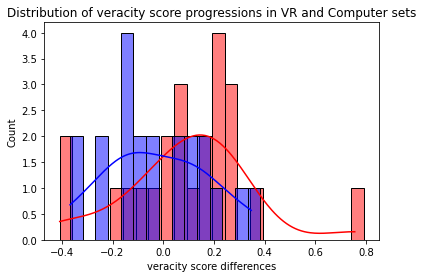

In [ ]:
binwdth = 0.05
vrPlot = sns.histplot(data = groupVR_progress, x = 'VRscoreDiff', kde = True, color = 'r', binwidth = binwdth)
(sns.histplot(data = groupComp_progress, x = 'CompscoreDiff', ax = vrPlot, kde = True, color = 'b', binwidth = binwdth)
    .set(title = 'Distribution of veracity score progressions in VR and Computer sets', xlabel = 'veracity score differences'))

Hence, we can assess that there are statistically different veracity scores when:


*   Using dataset 1 over dataset 2, both in VR and Computer;
*   There is a significant difference in results when repeating the experiment in VR;

However, no significant observations can be done on:


*   Progression, be it positive or negative in computer;
*   Differences in the distribution of user's progression in VR and Computer.

Hence, we want to check whether the observed progression in VR is positive or negative, again using a Mann-Whitney U test of nominal level 0.05, but this time one sided.

We hence formulate the following hypotheses:

$H_0$: The distribution of VR results in the first experiment the user goes through follow the same distribution as that of the second experiment.

$H_1$: There is a higher probability of picking a score from the set of results of experiment 2 that is higher than the one picked in set of experiment 1, than picking higher in set 1 than in set 2.

In [ ]:
Uvr_expProgress, pvr_expProgress = stats.mannwhitneyu(groupVR_exp2, groupVR_exp1, alternative = 'greater')
pvr_expProgress

0.03618244658916798

Hence, we can reject our null hypothesis, and assess a that there is a positive progression in VR, whereas none is to be observed in computer. In order to check whether this can be explained by the fact that we used the first experiment in VR as a burner, we compare the results in the first VR experiment to the first Computer experiment using the same procedure. Indeed, if VR has significantly weaker results than computer users, then we might be able to consider that the first experiment in VR was used to as a burner. The first exposure to full-sized VR datasets might be overwhelming and account for the observed progression.

In [ ]:
U_exp1_twosided, p_exp1_twosided = stats.mannwhitneyu(groupVR_exp1, groupComp_exp1)
p_exp1_twosided

U_exp1_onesided, p_exp1_onesided = stats.mannwhitneyu(groupVR_exp1, groupComp_exp1, alternative = 'less')
p_exp1_onesided

print("exp 1 two-sided: ", p_exp1_twosided, "exp 2 one-sided: ", p_exp1_onesided)

U_exp2_twosided, p_exp2_twosided = stats.mannwhitneyu(groupVR_exp2, groupComp_exp2)
p_exp2_twosided

U_exp2_onesided, p_exp2_onesided = stats.mannwhitneyu(groupVR_exp2, groupComp_exp2, alternative = 'less')
p_exp2_onesided

print("exp 2 two-sided: ", p_exp2_twosided, "exp 2 one-sided: ", p_exp2_onesided)

exp 1 two-sided:  0.023265436117313323 exp 2 one-sided:  0.023265436117313323
exp 2 two-sided:  0.22055384700092306 exp 2 one-sided:  0.7859168223699704


We have now gathered the following pieces of information:

*   There are no significant differences in the overall results of the VR experiment as opposed as the Computer experiment;
*   The first experiment in VR displays significantly lower veracity scores as in computer;
*   There is a significant increase in scores between the two VR experiments, and none in the computer's;
*   However, the results from the second experiment are not significantly higher in VR than in computer;

Hence, the observed VR progression could be explained by the fact that the first exposure to a human-sized 3D complex shape can be an overwhelming situation. Indeed, our tutorial scene was mainly designed for accustoming the user to the VR system's controls, and no dataset was shown in it.




# Progression in VR vs Computer with **True Proportion**

In [ ]:
scoresDf["sequenceOrder"] = (scoresDf["experimentOrder"] == 2) | (scoresDf["experimentOrder"] == 4)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


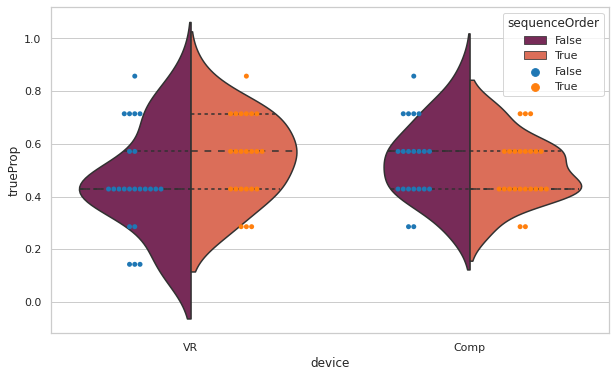

In [ ]:
plt.figure(figsize = (10,6))
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x='device', y='trueProp', hue='sequenceOrder', split=True, data=scoresDf, palette="rocket", inner='quartiles')
ax = sns.swarmplot(x='device', y='trueProp', hue='sequenceOrder', data=scoresDf, split=True, palette="tab10", edgecolor="grey")

In [ ]:
def delta(x):
  x=x.reset_index(drop=True)
  return x.diff()

In [ ]:
deltaDf=(pd.DataFrame(scoresDf
                          .groupby(['participantId','device'])
                          .trueProp
                          .apply(delta))
                                        .rename(columns={"trueProp": "deltaTrueProp"})
                                        .dropna())

In [ ]:
deltaDf.groupby('device').deltaTrueProp.mean()

device
Comp   -0.050000
VR      0.086957
Name: deltaTrueProp, dtype: float64

Let's notate $X_i$ the delta in trueProp for VR for participant $i$. n=25

- All the $X_i$ from all groups are independent of each other
- All the $X_i$ from all groups are identically distributed 
- Mean $μ_1$, Variance $σ_1^2$

Let's notate $Y_i$ the delta in trueProp for Computer for participant $i$. n=25

- All the $Y_i$ from all groups are independent of each other
- All the $Y_i$ from all groups are identically distributed
- Mean $μ_2$, Variance $σ_2^2$

$X_i$ and $Y_i$ are independant and we don't know their distributions.

We don't know the distributions of the two populations so we will use the Mann–Whitney U test to see if they fall under the same distribution, and we choose beforehand a nominal value $\alpha = 0.05$

Under the null hypothesis $H_0$, the distributions of both populations are equal, participants have the same progression between the 1st and 2nd experiment on VR and on Computer
The alternative hypothesis $H_1$ is that the distribution of the progression in VR is greater than that of Computer.


In [ ]:
deltaVr = deltaDf[deltaDf.index.get_level_values('device') == 'VR']["deltaTrueProp"]
deltaComp = deltaDf[deltaDf.index.get_level_values('device') == 'Comp']["deltaTrueProp"]

res= stats.mannwhitneyu(deltaVr, deltaComp, alternative="greater")
print(res)

MannwhitneyuResult(statistic=311.0, pvalue=0.02338428908413344)


The p-value is lower than 0.05, this means we reject $H_0$ in favor of our alternative, so participants have a greater progression speed in VR than using a Computer.  

# On average, is the **number of true answers** higher in VR than that in Comp ?

Let's notate $X_i$ the number of true answer, independently of their position of experiment $i$.

- All the $X_i$ from all groups are independent of each other
- The the $X_i$ are ordinal,

Under the null hypothesis $H_0$, the distributions of both populations are equal
The alternative hypothesis $H_1$ is that the distributions are not equal.

We can therefore use the Mann–Whitney U test, and we choose beforehand a nominal value $\alpha = 0.05$

In [ ]:
os.listdir(path)

['raw',
 'clean-data',
 'plot',
 '00-google-form-cleaning.ipynb',
 '00-dataCleaning.ipynb',
 'computed-data',
 'to-delete',
 '02-Questions and Plotting.ipynb',
 'XX-Test Corentin.ipynb',
 '02-Controls.ipynb',
 '01_scoreComputing.ipynb',
 '01-controlling-the-difficulty.ipynb',
 '03-participant-background.ipynb',
 '02-Results-questions.ipynb']

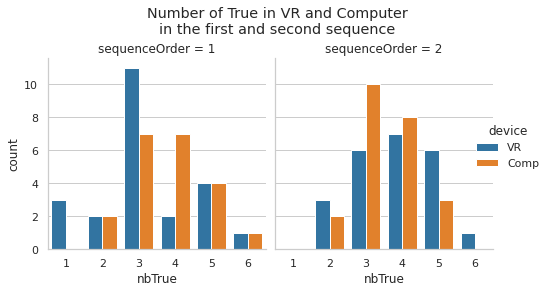

In [ ]:
rp = sns.catplot(x="nbTrue", hue="device",
          data=scoresDf, col="sequenceOrder",
          kind="count",palette='tab10')

rp.fig.subplots_adjust(top=0.8)
rp.fig.suptitle('Number of True in VR and Computer\nin the first and second sequence')
rp.fig.set_size_inches(7.5,4)
#rp.savefig(os.path.join(path,"plot/nb-true-VR-Comp.svg"))

In [ ]:
maxTrueStreakVr = scoresDf.query("device == 'VR'")["nbTrue"]
maxTrueStreakComp = scoresDf.query("device == 'Comp'")["nbTrue"]

U1, p = stats.mannwhitneyu(maxTrueStreakVr, maxTrueStreakComp)

print(f"Vr : {maxTrueStreakVr.mean()}, Compwh : {maxTrueStreakComp.mean()}, p-value : {p}")


Vr : 3.5217391304347827, Compwh : 3.6363636363636362, p-value : 0.3353792258644177


training vs not training in the Vr experiments

In [ ]:
serie1 = maxTrueStreakVr = scoresDf.query(f"device == 'VR'").query(f"sequenceOrder == 1")["nbTrue"]
serie2 = maxTrueStreakVr = scoresDf.query(f"device == 'VR'").query(f"sequenceOrder == 2")["nbTrue"]

U1, p = stats.mannwhitneyu(serie1, serie2)

print(f"Vr exp1 : {serie1.mean()}, Vr exp2 : {serie2.mean()}, p-value : {p}")

Vr exp1 : 3.217391304347826, Vr exp2 : 3.8260869565217392, p-value : 0.05172519219097402


training vs not training in the computer experiments

In [ ]:
serie1 = maxTrueStreakVr = scoresDf.query(f"device == 'Comp'").query(f"sequenceOrder == 1")["nbTrue"]
serie2 = maxTrueStreakVr = scoresDf.query(f"device == 'Comp'").query(f"sequenceOrder == 2")["nbTrue"]

U1, p = stats.mannwhitneyu(serie1, serie2)


print(f"Computer exp1 : {serie1.mean()}, Comp exp2 : {serie2.mean()}, p-value : {p}")

Computer exp1 : 3.761904761904762, Comp exp2 : 3.5217391304347827, p-value : 0.22852669207670845


Vr vs computer in the training experiments

In [ ]:
serie1 = maxTrueStreakVr = scoresDf.query(f"device == 'Comp'").query(f"sequenceOrder == 1")["nbTrue"]
serie2 = maxTrueStreakVr = scoresDf.query(f"device == 'VR'").query(f"sequenceOrder == 1")["nbTrue"]

U1, p = stats.mannwhitneyu(serie1, serie2)

print(f"Comp exp1 : {serie1.mean()}, Vr exp1 : {serie2.mean()}, p-value : {p}")

Comp exp1 : 3.761904761904762, Vr exp1 : 3.217391304347826, p-value : 0.06714956972640895


Vr vs computer in the second experiments

In [ ]:
serie1 = maxTrueStreakVr = scoresDf.query(f"device == 'Comp'").query(f"sequenceOrder == 2")["nbTrue"]
serie2 = maxTrueStreakVr = scoresDf.query(f"device == 'VR'").query(f"sequenceOrder == 2")["nbTrue"]

U1, p = stats.mannwhitneyu(serie1, serie2)

print(f"Comp exp2  : {serie1.mean()}, Vr exp2 : {serie2.mean()}, p-value : {p}")

Comp exp2  : 3.5217391304347827, Vr exp2 : 3.8260869565217392, p-value : 0.15610287614402713


**analysis** : no big difference is found globally between Vr and computer.

It seems that during the first experiments, the computer group had more success, albeit a more precise experiment is necessary to confirm that trend (p-value = 0,067)

However, during the second experiment, the difference between Computer and Vr decreased, Vr having even a greater, but not significantly, success rate than Computer.

This can be explained by the fact that the success rate of VR increased between the first and second experiment (we need to confirm this trend with further experiments) while the computer experiments don't show any significant change.

# Comparison of **Longuest streak** in VR and Computers

Let's notate $X_i$ the longest streak of experiment $i$.

- All the $X_i$ from all groups are independent of each other
- The the $X_i$ are ordinal,

Under the null hypothesis $H_0$, the distributions of both populations are equal
The alternative hypothesis $H_1$ is that the distributions are not equal.

We can therefore use the Mann–Whitney U test, and we choose beforehand a nominal value $\alpha = 0.05$

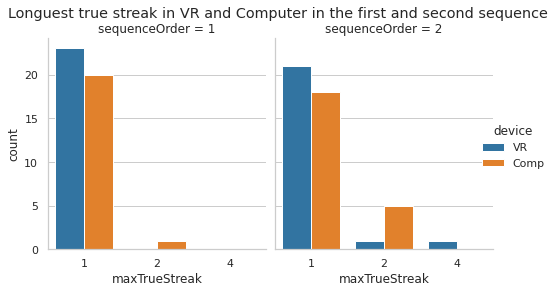

In [ ]:
rp = sns.catplot(x="maxTrueStreak", hue="device",
          data=scoresDf, col="sequenceOrder",
          kind="count",palette='tab10')


rp.fig.subplots_adjust(top=0.87)
rp.fig.set_size_inches(7.5,4)
rp.fig.suptitle('Longuest true streak in VR and Computer in the first and second sequence')
rp.savefig(os.path.join(path,"plot/longuest-streak-VR-Comp.svg"))

global comparision between Vr and computer, no matter the experiment order

In [ ]:
maxTrueStreakVr = scoresDf.query("device == 'VR'")["maxTrueStreak"]
maxTrueStreakComp = scoresDf.query("device == 'Comp'")["maxTrueStreak"]

U1, p = stats.mannwhitneyu(maxTrueStreakVr, maxTrueStreakComp)

print(f"Vr : {maxTrueStreakVr.mean()}, Comp : {maxTrueStreakComp.mean()}, p-value : {p}")


Vr : 1.0869565217391304, Comp : 1.1363636363636365, p-value : 0.069278082091549


training vs not training in the Vr experiments

In [ ]:
serie1 = scoresDf.query(f"device == 'VR'").query(f"sequenceOrder == 1")["maxTrueStreak"]
serie2 = scoresDf.query(f"device == 'VR'").query(f"sequenceOrder == 2")["maxTrueStreak"]

U1, p = stats.mannwhitneyu(serie1, serie2)

print(f"Vr exp1 : {serie1.mean()}, Vr exp2 : {serie2.mean()}, p-value : {p}")

Vr exp1 : 1.0, Vr exp2 : 1.173913043478261, p-value : 0.08094290060338688


training vs not training in the computer experiments

In [ ]:
serie1 = scoresDf.query(f"device == 'Comp'").query(f"sequenceOrder == 1")["maxTrueStreak"]
serie2 = scoresDf.query(f"device == 'Comp'").query(f"sequenceOrder == 2")["maxTrueStreak"]

U1, p = stats.mannwhitneyu(serie1, serie2)


print(f"Comp exp1 : {serie1.mean()}, Comp exp2 : {serie2.mean()}, p-value : {p}")

Comp exp1 : 1.0476190476190477, Comp exp2 : 1.2173913043478262, p-value : 0.05473463135728221


Vr vs computer in the training experiments

In [ ]:
serie1 = scoresDf.query(f"device == 'Comp'").query(f"sequenceOrder == 1")["maxTrueStreak"]
serie2 = scoresDf.query(f"device == 'VR'").query(f"sequenceOrder == 1")["maxTrueStreak"]

U1, p = stats.mannwhitneyu(serie1, serie2)

print(f"Comp exp1 : {serie1.mean()}, Vr exp1 : {serie2.mean()}, p-value : {p}")

Comp exp1 : 1.0476190476190477, Vr exp1 : 1.0, p-value : 0.15840502567450304


Vr vs computer in the second experiments

In [ ]:
serie1 = maxTrueStreakVr = scoresDf.query(f"device == 'Comp'").query(f"sequenceOrder == 2")["maxTrueStreak"]
serie2 = maxTrueStreakVr = scoresDf.query(f"device == 'VR'").query(f"sequenceOrder == 2")["maxTrueStreak"]

U1, p = stats.mannwhitneyu(serie1, serie2)

print(f"Comp exp2 : {serie1.mean()}, Vr exp2 : {serie2.mean()}, p-value : {p}")

Comp exp2 : 1.2173913043478262, Vr exp2 : 1.173913043478261, p-value : 0.1334501540607292


**analysis** : globally, the computer group seem to have better longest streaks, but we need to confirm this trend (p-value = 0.069).

When pairing the experiments by their order, we don't see really clear difference between computer and Vr

It seems that in both experiments, participants improved between the first and second experiments, but we need more experiments to confirm this (p-values : 0.081 for Vr, 0.055 for Computer)

# On average, is the **Levenshtein distance** higher in VR than that in Comp ?

Let's notate $X_i$ the Levenstein distance of experiment $i$.

- All the $X_i$ from all groups are independent of each other
- The the $X_i$ are ordinal,

Under the null hypothesis $H_0$, the distributions of both populations are equal.
The alternative hypothesis $H_1$ is that the distributions are not equal.

We can therefore use the Mann–Whitney U test, and we choose beforehand a nominal value $\alpha = 0.05$

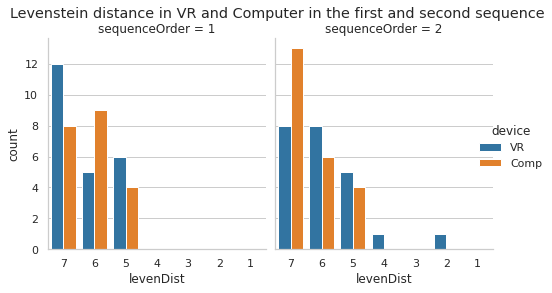

In [ ]:
rp = sns.catplot(x="levenDist", hue="device",
          data=scoresDf, col="sequenceOrder",
          kind="count", order=list(range(7,0,-1)),
          palette='tab10')

rp.fig.subplots_adjust(top=0.87)

rp.fig.set_size_inches(7.5,4)
rp.fig.suptitle('Levenstein distance in VR and Computer in the first and second sequence')

rp.savefig(os.path.join(path,"plot/leven-dist-VR-Comp.svg"))

In [ ]:
maxTrueStreakVr = scoresDf.query("device == 'VR'")["levenDist"]
maxTrueStreakComp = scoresDf.query("device == 'Comp'")["levenDist"]

U1, p = stats.mannwhitneyu(maxTrueStreakVr, maxTrueStreakComp)

print(f"Vr : {maxTrueStreakVr.mean()}, Comp : {maxTrueStreakComp.mean()}, p-value : {p}")


Vr : 6.065217391304348, Comp : 6.295454545454546, p-value : 0.20251881816235218


training vs not training in the Vr experiments

In [ ]:
serie1 = scoresDf.query(f"device == 'VR'").query(f"sequenceOrder == 1")["levenDist"]
serie2 = scoresDf.query(f"device == 'VR'").query(f"sequenceOrder == 2")["levenDist"]

U1, p = stats.mannwhitneyu(serie1, serie2)

print(f"Vr exp1 : {serie1.mean()}, Vr exp2 : {serie2.mean()}, p-value : {p}")

Vr exp1 : 6.260869565217392, Vr exp2 : 5.869565217391305, p-value : 0.14624090899455838


training vs not training in the computer experiments

In [ ]:
serie1 = scoresDf.query(f"device == 'Comp'").query(f"sequenceOrder == 1")["levenDist"]
serie2 = scoresDf.query(f"device == 'Comp'").query(f"sequenceOrder == 2")["levenDist"]

U1, p = stats.mannwhitneyu(serie1, serie2)


print(f"Comp exp1 : {serie1.mean()}, Comp exp2 : {serie2.mean()}, p-value : {p}")

Comp exp1 : 6.190476190476191, Comp exp2 : 6.391304347826087, p-value : 0.16584806883344


Vr vs computer in the training experiments

In [ ]:
serie1 = scoresDf.query(f"device == 'Comp'").query(f"sequenceOrder == 1")["levenDist"]
serie2 = scoresDf.query(f"device == 'VR'").query(f"sequenceOrder == 1")["levenDist"]

U1, p = stats.mannwhitneyu(serie1, serie2)

print(f"Comp exp1 : {serie1.mean()}, Vr exp2 : {serie2.mean()}, p-value : {p}")

Comp exp1 : 6.190476190476191, Vr exp2 : 6.260869565217392, p-value : 0.3381778892123424


In [ ]:
serie1 = scoresDf.query(f"device == 'Comp'").query(f"sequenceOrder == 2")["levenDist"]
serie2 = scoresDf.query(f"device == 'VR'").query(f"sequenceOrder == 2")["levenDist"]

U1, p = stats.mannwhitneyu(serie1, serie2, alternative='greater')

print(f"Comp exp2 : {serie1.mean()}, Vr exp2 : {serie2.mean()}, p-value : {p}")

Comp exp2 : 6.391304347826087, Vr exp2 : 5.869565217391305, p-value : 0.05998313137508271


**analysis** : we don't see really significant difference between Vr and computer globally.

It seems that computer did worse than Vr during the second experiments (bigger distance) but we need to confirm this (p-value = 0.060)

Indeed, it seems that the Vr group improved between the 1st and second sequence while the computer group worsen. However those results are not significants.